<a href="https://colab.research.google.com/github/blibbliblo/LinearRegressionModel/blob/main/SalaryLinear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("krishnaraj30/salary-prediction-data-simple-linear-regression")

print("Path to dataset files:", path)

100%|██████████| 734/734 [00:00<00:00, 1.32MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/krishnaraj30/salary-prediction-data-simple-linear-regression/versions/2


In [3]:
training_set = pd.read_csv(f"{path}/Salary_Data.csv")

x_train = training_set["YearsExperience"].values
y_train = training_set["Salary"].values

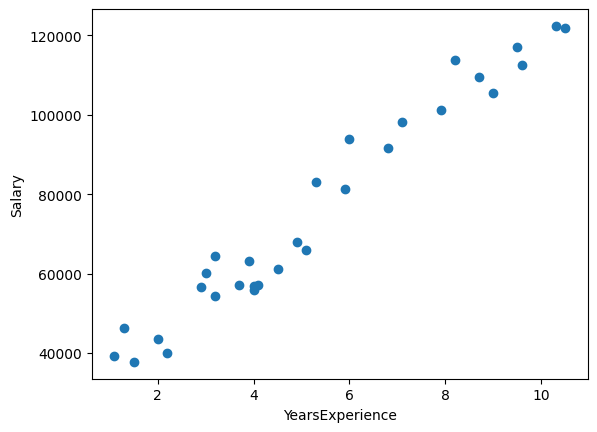

In [4]:
plt.scatter(x_train, y_train)
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.show()
# preprocess visualization

In [5]:
def cost_function(x, y, w, b):
    m = len(x)
    cost_sum = 0

    for i in range(m):
        f = w * x[i] + b
        cost = (f - y[i]) ** 2
        cost_sum += cost

    total_cost = (1/(2*m)) * cost_sum
    return total_cost
    # cost function 1/2m*(MSE)

In [6]:
def gradient_function(x, y, w, b):
    m = len(x)
    dc_dw = 0
    dc_db = 0

    for i in range(m):
        f = w * x[i] + b

        dc_dw += (f - y[i]) * x[i]
        dc_db += (f - y[i])

    dc_dw = (1/m) * dc_dw
    dc_db = (1/m) * dc_db

    return dc_dw, dc_db
    # gradient function (partial derivative)

In [11]:
def gradient_descent(x, y, alpha, iterations):
    w = 0
    b = 0
    # initial w,b

    for i in range(iterations):
        dc_dw, dc_db = gradient_function(x, y, w, b)

        w = w - alpha * dc_dw
        b = b - alpha * dc_db

        print(f"Iteration {i}: Cost {cost_function(x, y, w, b)}")

    return w, b
    # to lowest possible cost

In [12]:
learning_rate = 0.01
iterations = 10000

final_w, final_b = gradient_descent(x_train, y_train, learning_rate, iterations)

print(f"w: {final_w:.4f}, b: {final_b:.4f}")

Streaming output truncated to the last 5000 lines.
Iteration 5001: Cost 15635475.900002701
Iteration 5002: Cost 15635475.899838459
Iteration 5003: Cost 15635475.899674928
Iteration 5004: Cost 15635475.89951208
Iteration 5005: Cost 15635475.899349924
Iteration 5006: Cost 15635475.899188451
Iteration 5007: Cost 15635475.899027659
Iteration 5008: Cost 15635475.898867534
Iteration 5009: Cost 15635475.898708116
Iteration 5010: Cost 15635475.898549354
Iteration 5011: Cost 15635475.898391267
Iteration 5012: Cost 15635475.898233844
Iteration 5013: Cost 15635475.898077093
Iteration 5014: Cost 15635475.897920989
Iteration 5015: Cost 15635475.897765554
Iteration 5016: Cost 15635475.897610782
Iteration 5017: Cost 15635475.897456657
Iteration 5018: Cost 15635475.897303184
Iteration 5019: Cost 15635475.897150366
Iteration 5020: Cost 15635475.896998184
Iteration 5021: Cost 15635475.896846654
Iteration 5022: Cost 15635475.89669575
Iteration 5023: Cost 15635475.8965455
Iteration 5024: Cost 15635475.896

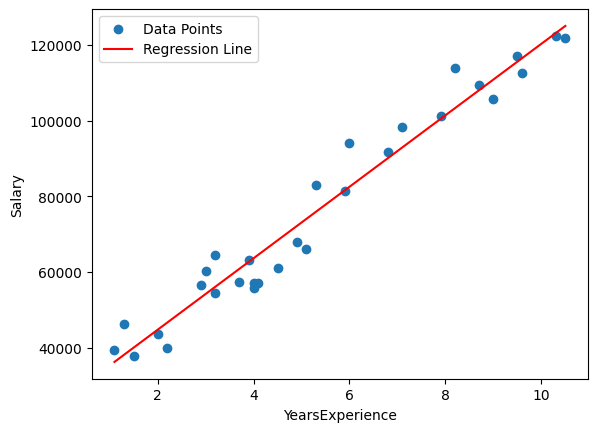

In [14]:
plt.scatter(x_train, y_train, label='Data Points')

x_vals = np.linspace(min(x_train), max(x_train), 100)
y_vals = final_w * x_vals + final_b
plt.plot(x_vals, y_vals, color='red', label='Regression Line')

plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.legend()
plt.show()